In [1]:
#Загружаем наш дата сет. Мы имеем дата сет из 5 колонок (UserID, Gender, Age, Estimated Salary, Purchased) и 400 строк. Крайний столбец Purchased выступает как классификатор.

In [2]:
# Загружаем необходимые библиотеки для начала работы (Numpy, Matplotlib.pyplot ,Pandas)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Загружаем дата сет в формате сsv, разделитель запятые, без столбца User ID (так как он не влияет на вычисления и построение)
df = pd.read_csv('cherkasov_ads.csv', sep=',' )
df = df.drop(['UserID'], axis=1)

In [4]:
# Проверяем как загрузился дата сет. 
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [5]:
# Проводим кодирование качественных переменных.
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [6]:
df = encoding_char(df)

In [7]:
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [8]:
# Делим наш дата сет на обучающую и тестирующую выборку в пропорции 20/80.
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [9]:
# Производим шкалирование наших данных без нашей эдогенной переменной Purchased.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

In [10]:
# Строим базовую модель и смотрим на полученный отчет. Можно сделать вывод, что значимых перменных только две.
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.380897
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.424     
Dependent Variable: y                AIC:              249.7740  
Date:               2021-01-12 20:05 BIC:              261.0789  
No. Observations:   320              Log-Likelihood:   -121.89   
Df Model:           2                LL-Null:          -211.70   
Df Residuals:       317              LLR p-value:      9.8765e-40
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
        Coef.     Std.Err.       z       P>|z|      [0.025    0.975]
--------------------------------------------------------------------
x1     -0.1428      0.1597    -0.8944    0.3711    -0.4559    0.1702
x2      2.3168      0.2879     8.0460    0.0000     1.

In [11]:
# Остлавляем только значимые переменные.
X_train = X_train[:,[1,2]]
X_test = X_test[:,[1,2]]

In [12]:
# Обучаем модель логистической регрессии.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train, y_train)

In [13]:
# Делаем прогноз на тестовой выборке. Уровень качества модели выше нормального (83%), то есть 83% объектов будут распознаны правильно.
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.8375

In [14]:
# Строим таблицу сопряженности. Можно сделать вывод, что 6 положительных случая ложно определены как отрицательные и 7 отрицательных случаев определены моделью как положительные. 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[50  7]
 [ 6 17]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


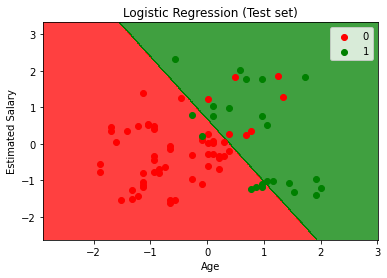

In [15]:
# Строим область значений. Они отделяются линейно. Зелёные точки - возможность покупки, красные точки - невозможность покупки.  
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [16]:
# Устанавливаем необходимые пакеты Keras.
import keras
from keras.models import Sequential
from keras.layers import Dense

In [17]:
# Строим нейронную сеть прямой передачи сигнала. На входном слое 6 нейрона (усложнее). Используем функцию relu, которая позволит учесть наличие линейнносоти в исходных данных. На втором слое выбирем 1 нейрон используя сигмоидальную функцию. 
cnn = Sequential()
cnn.add(Dense(units = 6,  activation = 'relu', input_dim = 2))
cnn.add(Dense(units = 1,  activation = 'sigmoid'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
# Обучаем нейронную сеть в течении 100 эпох.
cnn.fit(X_train, y_train, epochs = 100, batch_size = 8)

Epoch 1/100
40/40 [==============================] - 0s 486us/step - loss: 0.8143 - accuracy: 0.4859
Epoch 2/100
40/40 [==============================] - 0s 434us/step - loss: 0.7722 - accuracy: 0.4900
Epoch 3/100
40/40 [==============================] - 0s 434us/step - loss: 0.6927 - accuracy: 0.6127
Epoch 4/100
40/40 [==============================] - 0s 384us/step - loss: 0.6302 - accuracy: 0.6794
Epoch 5/100
40/40 [==============================] - 0s 384us/step - loss: 0.5947 - accuracy: 0.6536
Epoch 6/100
40/40 [==============================] - 0s 379us/step - loss: 0.5455 - accuracy: 0.7891
Epoch 7/100
40/40 [==============================] - 0s 384us/step - loss: 0.5120 - accuracy: 0.8371
Epoch 8/100
40/40 [==============================] - 0s 384us/step - loss: 0.4574 - accuracy: 0.8608
Epoch 9/100
40/40 [==============================] - 0s 408us/step - loss: 0.4651 - accuracy: 0.8303
Epoch 10/100
40/40 [==============================] - 0s 384us/step - loss: 0.4039 - accura

40/40 [==============================] - 0s 384us/step - loss: 0.2750 - accuracy: 0.9123
Epoch 82/100
40/40 [==============================] - 0s 384us/step - loss: 0.2037 - accuracy: 0.9290
Epoch 83/100
40/40 [==============================] - 0s 384us/step - loss: 0.3027 - accuracy: 0.8877
Epoch 84/100
40/40 [==============================] - 0s 435us/step - loss: 0.2580 - accuracy: 0.8881
Epoch 85/100
40/40 [==============================] - 0s 384us/step - loss: 0.2357 - accuracy: 0.9137
Epoch 86/100
40/40 [==============================] - 0s 383us/step - loss: 0.1953 - accuracy: 0.9268
Epoch 87/100
40/40 [==============================] - 0s 384us/step - loss: 0.2096 - accuracy: 0.9299
Epoch 88/100
40/40 [==============================] - 0s 358us/step - loss: 0.2204 - accuracy: 0.9127
Epoch 89/100
40/40 [==============================] - 0s 384us/step - loss: 0.2679 - accuracy: 0.8950
Epoch 90/100
40/40 [==============================] - 0s 358us/step - loss: 0.2702 - accuracy: 

In [19]:
# Строим прогноз на тестовой выборке.
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.5)

In [20]:
# Строим таблицу сопряженности. Можно сделать вывод, что 2 положительных случая ложно определены как отрицательные и 7 отрицательный случай ложно определен как положительный.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[50  7]
 [ 2 21]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


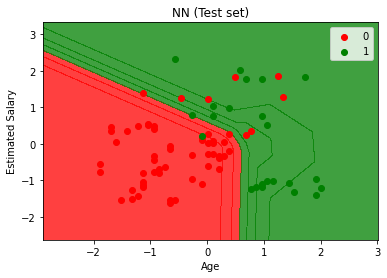

In [21]:
# Строим область значений. Они отделяются не линейно.  
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, cnn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [22]:
# Выводы. Подводя итоги можно сказать, что исходная логистическая модель обладает хорошей точностью и качественностью и определяет 83% объектов верно. Так же стоит отметить, что позитивные и негативные значения отдлеяются линейно в случае логичстичекой регрессии и не линейно при построении нейронной сети. Эту линейность мы используем для построения нейронной сети. При использовании стандартных параметров мы получаем качество модели худше, но при этом сохраняется линейность отделения позитивных от негативных. Для улучшения качества модели было принято решение увеличить количество нейронов на первом слое с 2 до 6, что позволило немного улучшить качество модели в целом, однако разделение положительных от отрицательных более не линейно. 